# Case Study 2 - Harman Singh Sangha

Analysing raw yield data collected using yield monitors at KBS - LTER. KBS LTER program studies ecological impact of intensive field crop farming and its environmental consequences. This research station is desinged to understand the effects of different agronomic managemnet practices to improve pest control, nitrogen intake and soil fertility. 

## Data Type

The data set to be used include the following columns

<img src = 'column.png'>

## We will be analysing data from year 2002-2013. 

We will look at yields from different crop over the year and see if there are changes within the years for same type of crop. 

In [1]:
# Import the necessary libraries and commands

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Load the data using read_csv tool by pandas and print first 5 lines

yield_data = pd.read_csv('yield_data.csv')
yield_data.head()

,longitude,latitude,crop_flow_lb_s,datetime,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,field,dataset,product,elevation_ft
0,-85.372824,42.408276,3.29,2013-07-24 19:20:04+00,1,56.0,180,6.6,0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
1,-85.372838,42.408288,2.89,2013-07-24 19:20:03+00,1,47.0,180,6.6,0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
2,-85.372847,42.408296,2.89,2013-07-24 19:20:02+00,1,38.0,180,6.6,0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
3,-85.372855,42.408301,3.69,2013-07-24 19:20:01+00,1,18.0,180,6.6,0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
4,-85.372855,42.408304,3.39,2013-07-24 19:20:00+00,1,39.0,180,6.6,0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5


The first step before analysing the data is to remove all the non-required rows. In the status column, 0 indicates the header of the combine is up and 1 indicates the header of the combine is down. We are goping to remove all the rows with the header status of 0. My system kept shutting down due to load of the process. So, instead of storing the values in a dataframe I wrote the rows in a text file and called that file again into a new dataframe

In [3]:
f = open("new_yield.txt","w+")
#new_db = pd.DataFrame(columns = ['longitude, latitude, crop_flow_lb_s, datetime, duration, distance_in, swth_wdth_in, moisture, status, pass_num, serial_number, field, dataset, product, elevation_ft, New_Date, Year_Col'])
for row in yield_data.itertuples():
    if row[9] == 1:
        f.write("%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s\n" % (row[1],',',row[2],',',row[3],',',row[4],',',row[5],',',row[6],',',row[7],',',row[8],',',row[9],',',row[10],',',row[11],',',row[12],',',row[13],',',row[14],',',row[15]))
        #new_db.append(pd.Series(['row'], index = new_db.columns), ignore_index=True)
    else:
        next
f.close()

In [5]:
new_db = pd.read_csv('new_yield.txt', sep=",", header=None)
new_db.columns = ['longitude', 'latitude', 'crop_flow_lb_s', 'datetime', 'duration', 'distance_in', 'swth_wdth_in', 'moisture', 'status', 'pass_num', 'serial_number', 'field', 'dataset', 'product', 'elevation_ft']
new_db.head()

,longitude,latitude,crop_flow_lb_s,datetime,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,field,dataset,product,elevation_ft
0,-85.372835,42.408260,2.49,2013-07-24 19:19:53+00,1,62.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50
1,-85.372835,42.408276,1.89,2013-07-24 19:19:52+00,1,75.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50
2,-85.372833,42.408293,3.39,2013-07-24 19:19:51+00,1,82.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50
3,-85.372833,42.408313,3.29,2013-07-24 19:19:50+00,1,89.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50
4,-85.372833,42.408332,3.29,2013-07-24 19:19:49+00,1,90.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.92


In this step we change the datatype for datetime column using datetime function. Then added the updated column to the dataframe.

In [6]:
import datetime

new_datetime = pd.to_datetime(new_db['datetime'])
new_db['New_Date'] = new_datetime
new_db.head()

,longitude,latitude,crop_flow_lb_s,datetime,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,field,dataset,product,elevation_ft,New_Date
0,-85.372835,42.408260,2.49,2013-07-24 19:19:53+00,1,62.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:53
1,-85.372835,42.408276,1.89,2013-07-24 19:19:52+00,1,75.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:52
2,-85.372833,42.408293,3.39,2013-07-24 19:19:51+00,1,82.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:51
3,-85.372833,42.408313,3.29,2013-07-24 19:19:50+00,1,89.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:50
4,-85.372833,42.408332,3.29,2013-07-24 19:19:49+00,1,90.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.92,2013-07-24 19:19:49


Now we islolate the year from the new datetime column and add it to a new column. This column will be used later to classify crop by year.

In [7]:
year_col = new_db['New_Date'].dt.year
new_db['Year_Col'] = year_col
new_db.head()

,longitude,latitude,crop_flow_lb_s,datetime,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,field,dataset,product,elevation_ft,New_Date,Year_Col
0,-85.372835,42.408260,2.49,2013-07-24 19:19:53+00,1,62.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:53,2013
1,-85.372835,42.408276,1.89,2013-07-24 19:19:52+00,1,75.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:52,2013
2,-85.372833,42.408293,3.39,2013-07-24 19:19:51+00,1,82.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:51,2013
3,-85.372833,42.408313,3.29,2013-07-24 19:19:50+00,1,89.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:50,2013
4,-85.372833,42.408332,3.29,2013-07-24 19:19:49+00,1,90.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.92,2013-07-24 19:19:49,2013


Now we calculate the yield in bu/ac for that specific row of data. The formula used was as follows: 

Yield = (Crop flow (lbs/s) * 144 (inch to feet conversion) * 726 (lbs/sq. ft to bu/ac conversion))  / Distance travelled (in) * Swath width (in)

The problem we ran into was that there were some instances where the distance travelled and swath width for some reason was stored as zero. Due to this the conversion for yield gave us a infinte value. For resolving this we simply went with a for loop with if-else statements in it. We simply dropped the rows with zero values and calculated the yield. We sent the yields to a list and later added that list as a column.

In [8]:
yield_val = []
for index, row in new_db.iterrows():
    if row['distance_in'] == 0 & row['swth_wdth_in'] == 0:
        new_db.drop(index, inplace=True)
    else:
        y_val = (row['crop_flow_lb_s']*144*726)/(row['distance_in']*row['swth_wdth_in'])
        yield_val.append(y_val)

In [9]:
new_db['Yields'] = yield_val
new_db.head()

,longitude,latitude,crop_flow_lb_s,datetime,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,field,dataset,product,elevation_ft,New_Date,Year_Col,Yields
0,-85.372835,42.408260,2.49,2013-07-24 19:19:53+00,1,62.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:53,2013,23.325677
1,-85.372835,42.408276,1.89,2013-07-24 19:19:52+00,1,75.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:52,2013,14.636160
2,-85.372833,42.408293,3.39,2013-07-24 19:19:51+00,1,82.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:51,2013,24.011122
3,-85.372833,42.408313,3.29,2013-07-24 19:19:50+00,1,89.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.50,2013-07-24 19:19:50,2013,21.470022
4,-85.372833,42.408332,3.29,2013-07-24 19:19:49+00,1,90.0,180,6.6,1,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.92,2013-07-24 19:19:49,2013,21.231467


After that we grouped the data based on year and crop and created a bar plot in which yields for different crops by each year was displayed.

In [12]:
avg_yields = new_db.groupby(['Year_Col','product'], as_index = False).mean()
avg_yields.head()

,Year_Col,product,longitude,latitude,crop_flow_lb_s,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,elevation_ft,Yields
0,2002,Corn,-85.371088,42.410650,4.257201,1.0,53.969740,89.436598,5.410032,1.0,2.020486,2.000140e+09,951.629645,94.719622
1,2003,Soybeans (Northrup King NK 520),-85.371614,42.410189,2.658704,1.0,77.726218,180.000000,11.294534,1.0,10.844524,5.648000e+03,952.003222,20.923401
2,2004,Corn (DeKalb DK-57-01),-85.373434,42.406690,8.600964,1.0,78.344733,134.897401,24.426218,1.0,47.985636,5.648000e+03,947.339412,85.934480
3,2004,Wheat (Sft Rd Wtr) (Pioneer 25R37),-85.371609,42.410237,5.753514,1.0,75.890761,180.000000,14.719205,1.0,11.434580,5.648000e+03,952.097634,43.148663
4,2005,Corn,-85.371097,42.410774,10.619456,1.0,65.803470,179.660446,16.175483,1.0,6.272859,5.648000e+03,951.710617,91.958428


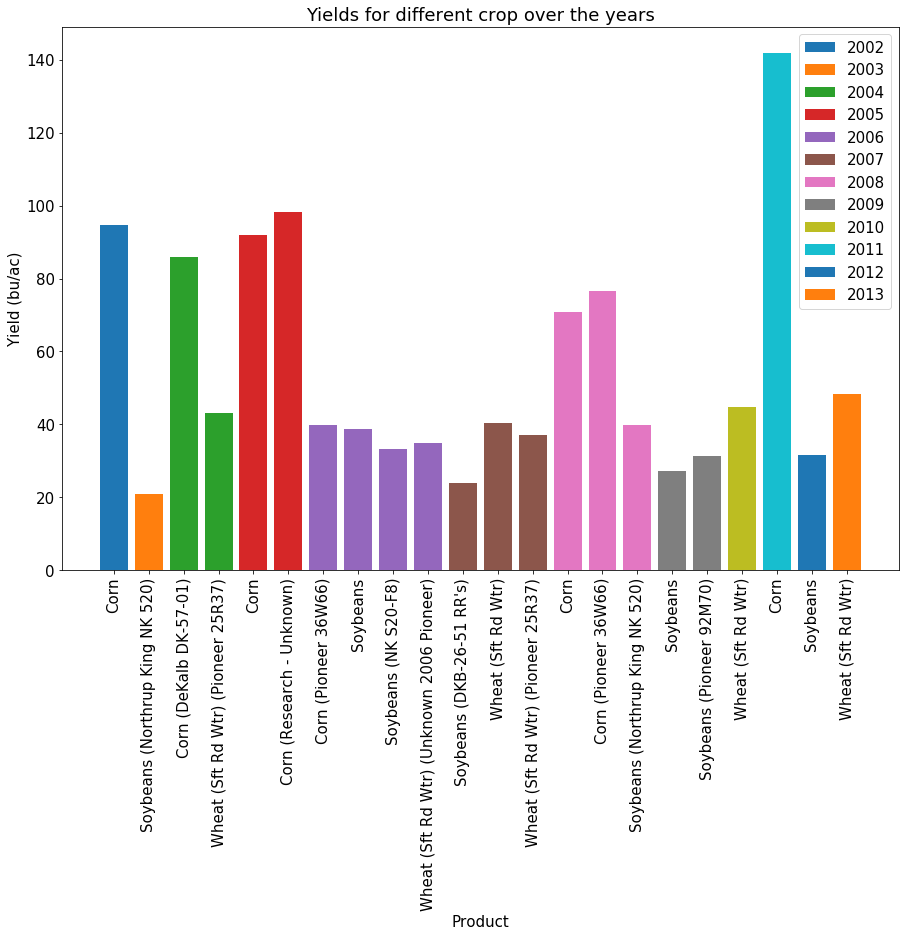

In [142]:
years = list(range(2002,2014))

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})

for i in years:
    
    subset_yield = avg_yields[avg_yields.Year_Col == i]
    labels = subset_yield['product']
    yields = subset_yield['Yields']
    plt.bar(labels + str(i), yields, width = 0.8, label = str(i))    
    
plt.title('Yields for different crop over the years') 
plt.xlabel('Product')
plt.xticks(rotation = 90)
plt.ylabel('Yield (bu/ac)')
plt.xticks(np.arange(len(avg_yields['product'])), avg_yields['product'])
plt.legend(years)
plt.show()

## Discussion for case study

From the bar graph we observe that the yields for each different crop over the years remained somewhat similar. Except for corn in the year 2006, where it is almost half of the expected value. 